In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung20221226/python/main/data/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
x = df[['Pclass', 'Sex', 'Age']]
y = df['Survived']

In [4]:
y[y==0] = -1

<ipython-input-4-117bf8437050>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y==0] = -1


In [5]:
np.unique(y)

array([-1,  1])

In [6]:
x.isnull().sum()

Pclass      0
Sex         0
Age       177
dtype: int64

<AxesSubplot:>

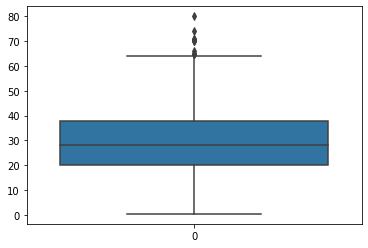

In [7]:
sns.boxplot(data=x['Age'])

In [8]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [9]:
x['Sex'] = x['Sex'].map({'male':0, 'female':1})

<ipython-input-9-cb625b615dd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Sex'] = x['Sex'].map({'male':0, 'female':1})


In [10]:
grouped = x.groupby(['Pclass', 'Sex'])

In [11]:
grouped['Age'].median()

Pclass  Sex
1       0      40.0
        1      35.0
2       0      30.0
        1      28.0
3       0      25.0
        1      21.5
Name: Age, dtype: float64

In [12]:
x.fillna(grouped.transform('median'), inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [13]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int64  
 2   Age     891 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 21.0 KB


데이터 정규화

In [14]:
x['Pclass'] = (x['Pclass'] - x['Pclass'].mean()) / x['Pclass'].std()
x['Sex'] = (x['Sex'] - x['Sex'].mean()) / x['Sex'].std()
x['Age'] = (x['Age'] - x['Age'].mean()) / x['Age'].std()
x.apply(np.median, axis=0)

<ipython-input-14-e0508d89ea5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Pclass'] = (x['Pclass'] - x['Pclass'].mean()) / x['Pclass'].std()
<ipython-input-14-e0508d89ea5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Sex'] = (x['Sex'] - x['Sex'].mean()) / x['Sex'].std()
<ipython-input-14-e0508d89ea5f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

Pclass    0.826913
Sex      -0.737281
Age      -0.233939
dtype: float64

In [15]:
temp = x.apply(lambda x: (x-x.mean()) / x.std(), axis=1)

In [16]:
temp['Pclass'].std()

0.8535611511838976

In [17]:
x

,Pclass,Sex,Age
0,0.826913,-0.737281,-0.534591
1,-1.565228,1.354813,0.668017
2,0.826913,1.354813,-0.233939
3,-1.565228,1.354813,0.442528
4,0.826913,-0.737281,0.442528
...,...,...,...
886,-0.369158,-0.737281,-0.158776
887,-1.565228,1.354813,-0.760080
888,0.826913,1.354813,-0.572172
889,-1.565228,-0.737281,-0.233939


In [18]:
class AdalineGD(object):
  ''' 아달린
  parameter:
    eta: float (0.0 ~ 1.0) 학습률
    n_iter: int 반복훈련 횟수
    random_state: int 랜덤시드값
    w_: 가중치
    cost_: list 에포크마다 누적된 비용함수의 제곱합
  '''
  def __init__(self, eta=0.01, n_iter=50, random_state=1)->None:
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  def fit(self, x,y):
    ''' 훈련함수
    x: array, shape = (samples,features)
    y: array, shape = (samples)
    '''
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+x.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
      net_input = self.net_input(x)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += self.eta * x.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)
    return self
  def net_input(self, x):
    '''최종계산'''
    return np.dot(x,self.w_[1:]) + self.w_[0]
  def activation(self, x):
    '''선형 활성화 계산'''
    return x
  def predict(self, x):
    ''' 단위 계산함수를 사용해서 클래스 레이블을 반환'''
    return np.where(self.activation(self.net_input(x)) >= 0.0, 1, -1)

In [19]:
adal = AdalineGD(eta=0.001).fit(x,y)

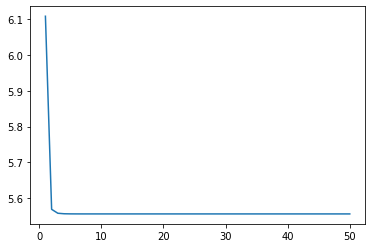

In [20]:
plt.plot(range(1,len(adal.cost_)+1),np.log(adal.cost_))

In [21]:
(adal.predict(x)==y).sum()/len(y)

0.7912457912457912

In [22]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
y[y == -1] = 0
xgb.fit(x,y)
xgb.score(x,y)

<ipython-input-22-f805f045cb7d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == -1] = 0


0.8698092031425365

대규모 데이터를 사용한 적응형 선형 뉴런(아달린)

In [23]:
class AdalineGD(object):
  ''' 아달린
  parameter:
    eta: float (0.0 ~ 1.0) 학습률
    n_iter: int 반복훈련 횟수
    shuffle: bool(default True)
      매 훈련마다 데이터를 섞는다
    random_state: int 랜덤시드값
    w_: 가중치
    cost_: list 에포크마다 누적된 비용함수의 제곱합
  '''
  def __init__(self, eta=0.01, n_iter=50, shuffle=True, random_state=1)->None:
    self.eta = eta
    self.n_iter = n_iter
    self.shuffle = shuffle
    self.w_initialized = False
    self.random_state = random_state
  
  def fit(self, x,y):
    ''' 훈련함수
    x: array, shape = (samples,features)
    y: array, shape = (samples)
    '''
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+x.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
      net_input = self.net_input(x)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += self.eta * x.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)
    return self
  
  def partial_fit(self, x, y):
    '''가중치를 초기화하지 않고 훈련데이터를 학습'''
    if not self.w_initialized:
      self._initialize_weights(x.shape[1])
    if y.ravel().shape[0] > 1:
      for xi, target in zip(x,y):
        self._update_weights(xi, target)
    else:
      self._update_weights(x,y)
    return self

    def _shuffle(self, x,y):
      r = self.rgen.permutation(len(y))
      return x[r], y[r]

  def _initialize_weights(self, m):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+m)
    self.w_initialized = True
  
  def _update_weights(self, xi, target):
    output = self.activation(self.net_input(xi))
    error = (target-output)
    self.w_[1:] += self.eta * xi.dot(error)
    self.w_[0] += self.eta * error
    cost = 0.5 * error**2
  
  def net_input(self, x):
    '''최종계산'''
    return np.dot(x,self.w_[1:]) + self.w_[0]
  
  def activation(self, x):
    '''선형 활성화 계산'''
    return x
  
  def predict(self, x):
    ''' 단위 계산함수를 사용해서 클래스 레이블을 반환'''
    return np.where(self.activation(self.net_input(x)) >= 0.0, 1, -1)

데이터 확보

In [24]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df =  pd.read_csv(s,header=None)
df = df.iloc[:100]
x = df.iloc[:,[0,2]]
y = df.iloc[:,-1]
y[:50] = -1
y[50:] = 1
y = y.astype(int)
x = x.to_numpy()
y = y.to_numpy()

<ipython-input-24-7e7656e5ee18>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[:50] = -1
<ipython-input-24-7e7656e5ee18>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[50:] = 1


In [25]:
x_std = np.copy(x)
x_std[:,0] = (x[:,0] - x[:,0].mean()) / x[:,0].std()
x_std[:,1] = (x[:,1] - x[:,1].mean()) / x[:,1].std()

In [26]:
ada = AdalineGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(x_std, y)

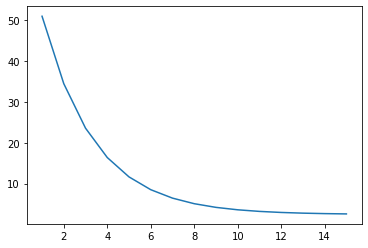

In [27]:
plt.plot(range(1,len(ada.cost_)+1), ada.cost_)

퍼셉트론 훈련

In [28]:
from sklearn import datasets

In [29]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [30]:
x = iris.data[:,[2,3]]
y = iris.target

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1, test_size=0.3, stratify=y)

In [33]:
np.bincount(y)

array([50, 50, 50])

In [34]:
np.bincount(y_train), np.bincount(y_test)

(array([35, 35, 35]), array([15, 15, 15]))

In [35]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
x_train_scaled = ss.transform(x_train)
x_test_scaled = ss.transform(x_test)

In [36]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(x_train_scaled, y_train)

Perceptron(eta0=0.1, random_state=1)

In [37]:
# 예측
y_pred = ppn.predict(x_test_scaled)

In [38]:
# 성능
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9777777777777777

In [39]:
class LogisticRegressionGD(object):
  ''' 경사하강법을 사용한 로지스특 회귀
  parameter : 
    eta : float (0.0~1.0)  학습률
    n_iter : int  반복훈련 횟수
    random_sate : int 랜덤시드값
    w_ : 가중치(학습)
    cost_ : list  에포크마다 누적된 비용함수의 제곱합
  '''
  def __init__(self,eta=0.01, n_iter=50, random_state = 1) -> None:
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  def fit(self, x,y):
    ''' 훈련함수
      x : array, shape = (samples, features )
      y : array, shape = (samples )      
    '''
    rgen = np.random.RandomState(self.random_state)
    self.w_ =  rgen.normal(loc=0.0, scale=0.01,size=1+x.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
      net_input = self.net_input(x);
      output = self.activation(net_input);
      errors = (y - output)
      # x 행렬, erros 벡터
      # 행렬-벡터 곱셈  x.T.dot(erros)
      self.w_[1:] += self.eta*x.T.dot(errors)
      self.w_[0] += self.eta*errors.sum()
      
      # 오차 제곱합 대신 로지스틱 비용을 계산
      cost = -y.dot(np.log(output)) - (1-y).dot(np.log(1-output))
      self.cost_.append(cost)
    return self

  def net_input(self, x):
    '''최종입력 함수'''
    return np.dot(x, self.w_[1:]) + self.w_[0]
  def activation(self, z):
    '''로지스틱 시그모이드 활성화 계산  '''
    return 1. / (1. + np.exp(-np.clip(z, -250,250)))    
  def predict(self, x):
    ''' 단위 계단함수를 사용해서 클래스 레이블을 반환'''
    return np.where(self.activation(self.net_input(x)) >=0.5, 1, 0  )
  

In [40]:
x_train_scaled.shape, y_train.shape

((105, 2), (105,))

In [41]:
np.unique(y_train)

array([0, 1, 2])

In [42]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [43]:
x = iris.data
y = iris.target
pd.DataFrame(x).info()
pd.DataFrame(y).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


In [44]:
x = StandardScaler().fit_transform(x)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1,stratify=y)

이진분류이기 때문에 0과 1에 해당하는 레이블에 대한 데이터만 추출한다

In [46]:
y_train_subset = y_train[y_train != 2]
x_train_subset = x_train[y_train != 2]

In [47]:
lr = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lr.fit(x_train_subset, y_train_subset)

In [48]:
lr.cost_

[52.05427408559702,
 9.223415546279103,
 5.982366799456865,
 4.588640638801786,
 3.7955328776051096,
 3.27417697688468,
 2.89965211447592,
 2.614153951628956,
 2.387246282709445,
 2.201325218293973,
 2.0454449861736825,
 1.9123970075530528,
 1.7972081554721016,
 1.6963148213316355,
 1.6070823349145626,
 1.5275115784056945,
 1.4560523120642543,
 1.391480057409452,
 1.3328123209008402,
 1.2792500107681395,
 1.2301354810047798,
 1.1849218469434184,
 1.1431501261183576,
 1.104431928430758,
 1.0684361569377663,
 1.0348786568403605,
 1.003514064955698,
 0.9741293242831507,
 0.9465384742584075,
 0.9205784294151962,
 0.8961055317554202,
 0.872992714465286,
 0.851127152858187,
 0.8304083067130001,
 0.8107462793369458,
 0.7920604346759575,
 0.77427822600054,
 0.7573341990921891,
 0.7411691401505753,
 0.725729344348786,
 0.710965985461063,
 0.6968345705550525,
 0.683294466588671,
 0.6703084880391561,
 0.6578425365392045,
 0.645865284995048,
 0.6343478998853678,
 0.6232637964434563,
 0.61258842225

(1.0, 10.0)

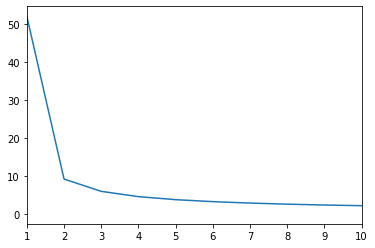

In [49]:
plt.plot(range(1,len(lr.cost_)+1), lr.cost_)
plt.xlim(1,10)

사이킷런 로지스틱회귀를 이용해서 확인

직접만든 아달린기반의 로지스틱회귀에 비해서 사이킷런이 제공하는 로지스틱회귀는 다중분류도 지원

In [50]:
x_train, y_train

(array([[ 6.74501145e-01,  9.82172869e-02,  9.90107977e-01,
          7.90670654e-01],
        [-9.00681170e-01,  1.47939788e+00, -1.28338910e+00,
         -1.05217993e+00],
        [ 5.53333275e-01, -5.92373012e-01,  7.62758269e-01,
          3.95774101e-01],
        [ 2.24968346e+00, -1.31979479e-01,  1.33113254e+00,
          1.44883158e+00],
        [ 6.74501145e-01, -3.62176246e-01,  3.08058854e-01,
          1.32509732e-01],
        [-5.25060772e-02, -8.22569778e-01,  7.62758269e-01,
          9.22302838e-01],
        [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
         -1.31544430e+00],
        [-1.14301691e+00, -1.51316008e+00, -2.60315415e-01,
         -2.62386821e-01],
        [ 2.12851559e+00, -1.31979479e-01,  1.61531967e+00,
          1.18556721e+00],
        [ 1.03800476e+00,  9.82172869e-02,  1.04694540e+00,
          1.58046376e+00],
        [-1.26418478e+00, -1.31979479e-01, -1.34022653e+00,
         -1.18381211e+00],
        [-1.73673948e-01, -3.62176246e-01, 

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

1.0

In [52]:
np.argmax(lr.predict_proba(x_test[:5]), axis=1), y_test[:5]

(array([2, 0, 0, 0, 1]), array([2, 0, 0, 0, 1]))

데이터 처리

In [53]:
df = pd.DataFrame([[1.0, 2.0, 3.0, 4.0], [5.0, 6.0, np.nan, 8.0], [10.0, 11.0, 12.0, np.nan]], columns=['A', 'B', 'C', 'D'])

In [54]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [55]:
df.isnull().any(axis=1)

0    False
1     True
2     True
dtype: bool

In [56]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [57]:
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [58]:
df['C'].mean()

7.5

In [59]:
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1']    
])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


순서가 있는 데이터 매핑

In [60]:
df['size'] = df['size'].map({
    'M':1, 'L':2, 'XL':3
})
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [61]:
np.unique(df['classlabel'])

array(['class1', 'class2'], dtype=object)

In [62]:
for idx, value in enumerate(np.unique(df['classlabel'])):
  print(idx, value)

0 class1
1 class2


In [63]:
mapdata = {value:idx for idx, value in enumerate(np.unique(df['classlabel']))}
mapdata

{'class1': 0, 'class2': 1}

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df.classlabel)

In [65]:
le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

In [66]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [67]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit_transform(df[['color']]).toarray()
ohe.fit_transform(df['color'].values.reshape(-1,1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [68]:
df.color

0    green
1      red
2     blue
Name: color, dtype: object

In [69]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([
    ('OneHot', OneHotEncoder(), [0]),
    ('nothing', 'passthrough', [1,2])
])
ct.fit_transform(df)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [70]:
pd.get_dummies(df.size)

,12
0,1


In [71]:
b = pd.DataFrame(LabelEncoder().fit_transform(df['size']), columns=['size'])

In [72]:
y = df['classlabel']
y = le.fit_transform(y)
y

array([0, 1, 0])

In [73]:
url = 'https://raw.githubusercontent.com/leekyuyoung20221226/python/main/data/abalone.data'
df = pd.read_csv(url, header=None)
df

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [74]:
df.nunique()

0       3
1     134
2     111
3      51
4    2429
5    1515
6     880
7     926
8      28
dtype: int64